#  <span style="color:brown">  Overview of Genetic Expression Data and Unsupervised Machine Learning Clustering

## **Bulk RNA-Sequencing**

- **What is it?**  
  Bulk RNA-sequencing is one of the most common methods for analyzing genetic expression data.  

- **How does it work?**  
  - Generates counts for mRNA transcripts, which can be used to find the counts for each gene.  
  - RNA-sequencing counts are **not absolute**:  
    - The counts depend on factors like sequencing depth, laboratory protocol, etc.  
  - It is only useful for comparing **relative expression** within or between samples.  

---

## **Cleaning RNA-Seq Data**

### Steps to Clean RNA-Seq Data:
1. **Remove missing values**  
2. **Visualize the raw data**  
3. **Remove genes with low counts**  
4. **Normalize the gene counts**  
5. **Log-transform the counts**  

### Why clean RNA-seq data?
- Often it is useful to remove genes with low expression:  
  - The most interesting genes are highly expressed.  
  - Higher expression -> Greater statistical power.  

---

### Example of RNA-Seq Data:

|       **Sample**       | **Sample 1** | **Sample 2** | **Sample 3** |
|-------------------------|--------------|--------------|--------------|
| **Gene 1**             | 1569         | 2142         | 1488         |
| **Gene 2**             | 58           | 86           | 25           |
| **Gene 3**             | 0            | 0            | 0            |

---
## **Why Do We Normalize Gene Counts?**

- **Reasons for Normalization:**  
  - Sequencing depth (number of counts) varies between samples.  
  - Technical or batch effects can influence counts.  

---

## **Normalizing Gene Counts**

- **How do we normalize gene counts?**  
  There are many methods:  
  - **Counts Per Million (CPM)**: Easy and reliable.  
  - **Transcripts Per Million (TPM)**: Offers additional benefits.  

Formula for CPM:
$$
\text{CPM} = \frac{\text{Reads Mapped to Gene}}{\text{Total Number of Reads}} \times 10^6
$$
---

## **Log-Transforming Counts**

### Main Idea:
- Log-transforming gene counts spreads the distribution out, making it easier to find important differences.

Formula:
$$
\text{log}_2(\text{count} + 1)
$$

---

## **Introduction to Machine Learning**

### Types of Machine Learning:
1. **Supervised Learning**:  
   - For labeled data, where inputs and outputs are known.
2. **Unsupervised Learning**:  
   - For unlabeled data, where the goal is to find patterns.  
3. **Reinforcement Learning**:  
   - Learning through rewards and punishments.  

---

## **Key Techniques in Unsupervised Learning**

### Principal Component Analysis (PCA):
- A powerful dimensionality reduction tool.  
- Simplifies complex datasets while retaining the most significant variance.  
- Useful for:  
  - Visualization.  
  - Noise reduction.  
![PCA Example](../pca.png)
    
### K-Means Clustering:
- Partitions data into distinct groups based on similarity.  
- Minimizes distances between cluster centers and data points.  
- Useful for:  
  - Segmentation tasks.  
![PCA Example](../kmc.png)
    
### Hierarchical Clustering:
- Builds a tree-like structure (**dendrogram**) to represent clusters at various levels.  
- Offers a flexible approach to grouping.  
 ![PCA Example](../hc.png)

##  <span style="color:brown"> A. Data Processing 

* ### When working with data, it’s almost always necessary to clean or process it before meaningful analysis can be performed.
* ### Raw data often contains inconsistencies, missing values, duplicates, or errors that must be addressed to ensure accurate and reliable results.


##  <span style="color:brown"> Importing Libraries 
* ### In Python, we use the `import` statement to bring in external libraries, which are collections of pre-written code that we can use to make our tasks easier. 
    
* ### By importing a library, we can access its functions and tools without having to write everything from scratch.

* ### In Python, we often use aliases when importing libraries. An alias is a shorthand name that makes it quicker and easier to refer to the library in your code. 
    * ###  Pandas: `pandas` is a powerful library for working with structured data, like tables (DataFrames). It helps us organize, clean, and analyze data efficiently.

    * ###  Numpy: `numpy` is another library that provides support for large, multi-dimensional arrays and matrices. It also includes a collection of mathematical functions that can be used to perform calculations on these arrays.
    
##  <span style="color:green "> >> Importing pandas and numpy
```python
%pip install pandas
import pandas as pd
import numpy as np
```   

In [1]:
# Import pandas and give it an alias pd
import pandas as pd
import numpy as np

##  <span style="color:green "> >> Reading a file with pandas

```python
import pandas as pd
df=pd.read_csv(filepath_or_buffer, sep=',',  header='infer', ...)
```
- **df**: The DataFrame object that stores the data read from the CSV file.
- **filepath_or_buffer**: The file path or URL of the CSV file.
- **sep**: The delimiter for the CSV (default is `','`).
- **header**: Row number(s) to use as column names (default is `'infer'`).


In [2]:
# Read the clinical data
clin_data = pd.read_csv("../data/data_clinical_patient.txt", sep='\t', header=4)

# Read the expression data
exp_data = pd.read_csv("../data/data_mrna_seq_v2_rsem.txt", sep='\t')


##  <span style="color:green "> >> Displaying a pandas DataFrame

```python
# To display the entire DataFrame
display(df)
```
```python
# To display the first `n` rows of the DataFrame (default is 5)
display(df.head(n=5))
```
```python
# To display the last `n` rows of the DataFrame (default is 5)
display(df.tail(n=5))
```
- **df**: The DataFrame object that stores the data read from the CSV file.
- **n**:  The number of rows to display.  

In [3]:
# Display the first two rows of the clinical data
display(clin_data.head(2))

# Display the first four rows of the expression data
display(exp_data.head(2))


,PATIENT_ID,SUBTYPE,CANCER_TYPE_ACRONYM,OTHER_PATIENT_ID,AGE,SEX,AJCC_PATHOLOGIC_TUMOR_STAGE,AJCC_STAGING_EDITION,DAYS_LAST_FOLLOWUP,DAYS_TO_BIRTH,...,IN_PANCANPATHWAYS_FREEZE,OS_STATUS,OS_MONTHS,DSS_STATUS,DSS_MONTHS,DFS_STATUS,DFS_MONTHS,PFS_STATUS,PFS_MONTHS,GENETIC_ANCESTRY_LABEL
0,TCGA-2W-A8YY,CESC_SquamousCarcinoma,CESC,5AEAC31A-176A-4F93-A376-A93A670821BB,51,Female,NaN,2009,533.0,-18886.0,...,Yes,0:LIVING,17.523096,0:ALIVE OR DEAD TUMOR FREE,17.523096,0:DiseaseFree,17.523096,0:CENSORED,17.523096,EUR
1,TCGA-4J-AA1J,CESC_SquamousCarcinoma,CESC,53EAC147-7EB8-4C54-A982-5E058D6749F8,31,Female,NaN,2009,542.0,-11611.0,...,Yes,0:LIVING,17.818983,0:ALIVE OR DEAD TUMOR FREE,17.818983,0:DiseaseFree,17.818983,0:CENSORED,17.818983,EUR


,Hugo_Symbol,Entrez_Gene_Id,TCGA-2W-A8YY-01,TCGA-4J-AA1J-01,TCGA-BI-A0VR-01,TCGA-BI-A0VS-01,TCGA-BI-A20A-01,TCGA-C5-A0TN-01,TCGA-C5-A1BE-01,TCGA-C5-A1BF-01,...,TCGA-ZJ-AAXD-01,TCGA-ZJ-AAXF-01,TCGA-ZJ-AAXI-01,TCGA-ZJ-AAXJ-01,TCGA-ZJ-AAXN-01,TCGA-ZJ-AAXT-01,TCGA-ZJ-AAXU-01,TCGA-ZJ-AB0H-01,TCGA-ZJ-AB0I-01,TCGA-ZX-AA5X-01
0,NaN,100130426,0.0000,0.0000,0.000,0.0000,0.000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,NaN,100133144,8.6373,7.6079,24.022,25.8961,14.303,5.5414,33.6598,5.2702,...,29.0009,34.1398,23.1787,34.7214,20.5319,15.7387,15.1475,11.3653,25.4056,11.8407


## <span style="color:green"> >> Selecting Columns in a DataFrame by Label 
    
```python    
df['column_label']
```
    
- **df**: The DataFrame object that stores the data read from the CSV file.
- **'column_label'**: Specifies the label (column name) to access in a  DataFrame.

## <span style="color:green"> >> Selecting rows or columns in a DataFrame by Label 
    
```python    
df.loc['row_label',:]
```
   
```python    
df.loc[:,'column_label']
```
    
- **df**: The DataFrame object that stores the data read from the CSV file.
- **'row_label'**: Specifies the label (row name) to access in a  DataFrame.
- **'column_label'**: Specifies the label (column name) to access in a  DataFrame.

## <span style="color:green"> >> Selecting rows or columns in a DataFrame by index 
    
```python    
df.iloc[row_index,:]
```
    
```python    
df.iloc[:,column_index]
```
    
- **df**: The DataFrame object that stores the data read from the CSV file.
- **row_index**: Specifies the integer index of the row to select. Indexing starts from 0.
- **column_index**: Specifies the integer index of the column to select. Indexing starts from 0.


In [4]:
## Select the 'PATIENT_ID' column in clinical data
clin_data['PATIENT_ID']
clin_data.loc[:,'PATIENT_ID']
clin_data.iloc[:,0]

0      TCGA-2W-A8YY
1      TCGA-4J-AA1J
2      TCGA-BI-A0VR
3      TCGA-BI-A0VS
4      TCGA-BI-A20A
           ...     
292    TCGA-ZJ-AAXT
293    TCGA-ZJ-AAXU
294    TCGA-ZJ-AB0H
295    TCGA-ZJ-AB0I
296    TCGA-ZX-AA5X
Name: PATIENT_ID, Length: 297, dtype: object

## <span style="color:green"> >> Printing Columns in a DataFrame
    
```python    
df.columns
```
- **df**: The DataFrame object that stores the data read from the CSV file.



In [5]:
# Print column names of the expression data
exp_data.columns

Index(['Hugo_Symbol', 'Entrez_Gene_Id', 'TCGA-2W-A8YY-01', 'TCGA-4J-AA1J-01',
       'TCGA-BI-A0VR-01', 'TCGA-BI-A0VS-01', 'TCGA-BI-A20A-01',
       'TCGA-C5-A0TN-01', 'TCGA-C5-A1BE-01', 'TCGA-C5-A1BF-01',
       ...
       'TCGA-ZJ-AAXD-01', 'TCGA-ZJ-AAXF-01', 'TCGA-ZJ-AAXI-01',
       'TCGA-ZJ-AAXJ-01', 'TCGA-ZJ-AAXN-01', 'TCGA-ZJ-AAXT-01',
       'TCGA-ZJ-AAXU-01', 'TCGA-ZJ-AB0H-01', 'TCGA-ZJ-AB0I-01',
       'TCGA-ZX-AA5X-01'],
      dtype='object', length=296)

## <span style="color:green"> >> Replacing Strings in a DataFrame
 
```python
df.str.replace(pat, repl, n=-1, ...)
```

- **df**: The DataFrame object that stores the data read from the CSV file.
- **pat**: The pattern to match (can be a string or regex pattern).
- **repl**: The string to replace `pat` with.
- **n**: The number of occurrences to replace (default is `-1`, which means replace all occurrences).


In [6]:
# Replace - by . in clinical dataset 'PATIENT_ID' columns
clin_data['PATIENT_ID']=clin_data['PATIENT_ID'].str.replace('-','.')

In [7]:
# Replace -01 by nothing in expression dataset column names
# Replace - by . in expression dataset column names
exp_data.columns = exp_data.columns.str.replace('-01', '')
exp_data.columns = exp_data.columns.str.replace('-', '.')


## <span style="color:green"> >> Checking for Missing  Values in a DataFrame

```python
df.isna()
```
- **df**: The DataFrame object that stores the data read from the CSV file.
- This function returns a DataFrame of the same shape as the original, but with boolean values indicating whether each element is missing (`NaN` or `None`).



In [8]:
## Check for Missing Values in expression data
exp_data.isna()
#exp_data.isna().sum()
#exp_data.isna().sum().sum()

,Hugo_Symbol,Entrez_Gene_Id,TCGA.2W.A8YY,TCGA.4J.AA1J,TCGA.BI.A0VR,TCGA.BI.A0VS,TCGA.BI.A20A,TCGA.C5.A0TN,TCGA.C5.A1BE,TCGA.C5.A1BF,...,TCGA.ZJ.AAXD,TCGA.ZJ.AAXF,TCGA.ZJ.AAXI,TCGA.ZJ.AAXJ,TCGA.ZJ.AAXN,TCGA.ZJ.AAXT,TCGA.ZJ.AAXU,TCGA.ZJ.AB0H,TCGA.ZJ.AB0I,TCGA.ZX.AA5X
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20526,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20527,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20528,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20529,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## <span style="color:green"> >> Removing rows that contain any missing (NaN) values

```python
df.dropna(inplace=True)
```
- **df**: The DataFrame object that stores the data read from the CSV file.
- **inplace**: When set to True, this argument modifies the original DataFrame df directly, removing rows with NaN values, instead of creating a new DataFrame with the rows removed.
- This function removes all rows in the DataFrame that contain at least one missing (NaN) value.

```python
df.dropna(subset=["column_name"],inplace=True)
```
- **df**: The DataFrame object that stores the data read from the CSV file.
- **inplace**: When set to True, this argument modifies the original DataFrame df directly, removing rows with NaN values, instead of creating a new DataFrame with the rows removed.
- This functions ensures that only rows where the column_name contains NaN values are removed, while other columns are unaffected.

In [9]:
## Remove Missing values from expression data 
exp_data.dropna(inplace=True)
exp_data.isna().sum().sum()


0

## <span style="color:green"> >> Setting and Resetting Index

```python
df.set_index('column_name', inplace=True)
```
- **df**: The DataFrame object that stores the data read from the CSV file.
- **column_name**: The name of the column to be set as the index of the DataFrame.
- **inplace**: When set to True, this argument modifies the original DataFrame df directly, making the specified column the new index.
-This function is useful when you want to set a specific column as the index of your DataFrame.

```python
df.reset_index(drop=True, inplace=True)
```
- **df**: The DataFrame object that stores the data read from the CSV file.
- **drop**: When set to True, it removes the current index entirely, instead of adding it as a new colum
 -inplace: When set to True, this argument modifies the original DataFrame df directly, resetting the index and avoiding the creation of a new DataFrame.

In [10]:
## Display expression data 
display(exp_data.head(2))

## Reset Index of expression data  
exp_data.reset_index(drop=True, inplace=True)

## Display expression data 
display(exp_data.head(2))



,Hugo_Symbol,Entrez_Gene_Id,TCGA.2W.A8YY,TCGA.4J.AA1J,TCGA.BI.A0VR,TCGA.BI.A0VS,TCGA.BI.A20A,TCGA.C5.A0TN,TCGA.C5.A1BE,TCGA.C5.A1BF,...,TCGA.ZJ.AAXD,TCGA.ZJ.AAXF,TCGA.ZJ.AAXI,TCGA.ZJ.AAXJ,TCGA.ZJ.AAXN,TCGA.ZJ.AAXT,TCGA.ZJ.AAXU,TCGA.ZJ.AB0H,TCGA.ZJ.AB0I,TCGA.ZX.AA5X
2,UBE2Q2P2,100134869,27.4857,29.1286,31.7792,24.7455,18.7904,11.8219,22.2574,2.9701,...,14.9954,43.1452,23.2202,25.6286,15.0167,12.0154,9.7116,17.7609,21.8099,29.9227
3,HMGB1P1,10357,118.5440,180.7090,165.6900,210.1520,303.6880,330.4380,116.9620,119.7680,...,200.1830,168.1650,162.5140,143.2310,137.4820,266.9130,244.3290,145.3760,157.5360,112.2740


,Hugo_Symbol,Entrez_Gene_Id,TCGA.2W.A8YY,TCGA.4J.AA1J,TCGA.BI.A0VR,TCGA.BI.A0VS,TCGA.BI.A20A,TCGA.C5.A0TN,TCGA.C5.A1BE,TCGA.C5.A1BF,...,TCGA.ZJ.AAXD,TCGA.ZJ.AAXF,TCGA.ZJ.AAXI,TCGA.ZJ.AAXJ,TCGA.ZJ.AAXN,TCGA.ZJ.AAXT,TCGA.ZJ.AAXU,TCGA.ZJ.AB0H,TCGA.ZJ.AB0I,TCGA.ZX.AA5X
0,UBE2Q2P2,100134869,27.4857,29.1286,31.7792,24.7455,18.7904,11.8219,22.2574,2.9701,...,14.9954,43.1452,23.2202,25.6286,15.0167,12.0154,9.7116,17.7609,21.8099,29.9227
1,HMGB1P1,10357,118.5440,180.7090,165.6900,210.1520,303.6880,330.4380,116.9620,119.7680,...,200.1830,168.1650,162.5140,143.2310,137.4820,266.9130,244.3290,145.3760,157.5360,112.2740


## <span style="color:green"> >> Checking for Duplicates in data 
```python
df.duplicated(subset=None, keep='first')`
```
- **df**: The DataFrame object that stores the data read from the CSV file.
- **subset**: Columns to consider for identifying duplicates. By default, it checks all columns.
- **keep**: Determines which duplicates to mark as `True`:
  - `'first'` (default): Marks duplicates as `True`, except for the first occurrence.
  - `'last'`: Marks duplicates as `True`, except for the last occurrence.
  - `False`: Marks all occurrences of duplicates as `True`.


In [11]:
## Check for duplicates in the expression data in the 'Hugo_Symbol' column
exp_data.duplicated(subset='Hugo_Symbol',keep=False)
exp_data.duplicated(subset='Hugo_Symbol',keep=False).sum()

14


## <span style="color:green"> >> Selecting by Boolean Indexing 

```pyhton 
df[condition]`
```
    
- **df**: The DataFrame object that stores the data read from the CSV file.
- **condition**: A boolean condition applied to the  DataFrame to filter data.


In [12]:
## Select all the duplicated rows of the expression data in the 'Hugo_Symbol' column
exp_data[exp_data.duplicated(subset='Hugo_Symbol',keep=False)]

## Select only the first occurence of the duplicated rows of the expression data in the 'Hugo_Symbol' column
exp_data[exp_data.duplicated(subset='Hugo_Symbol',keep='first')]


## Select only the last occurence of the duplicated rows of the expression data in the 'Hugo_Symbol' column
exp_data[exp_data.duplicated(subset='Hugo_Symbol',keep='last')]

,Hugo_Symbol,Entrez_Gene_Id,TCGA.2W.A8YY,TCGA.4J.AA1J,TCGA.BI.A0VR,TCGA.BI.A0VS,TCGA.BI.A20A,TCGA.C5.A0TN,TCGA.C5.A1BE,TCGA.C5.A1BF,...,TCGA.ZJ.AAXD,TCGA.ZJ.AAXF,TCGA.ZJ.AAXI,TCGA.ZJ.AAXJ,TCGA.ZJ.AAXN,TCGA.ZJ.AAXT,TCGA.ZJ.AAXU,TCGA.ZJ.AB0H,TCGA.ZJ.AB0I,TCGA.ZX.AA5X
482,PALM2AKAP2,445815,86.5880,178.8940,225.7590,411.3130,102.4470,448.3440,110.6060,656.4300,...,253.2450,241.8880,10.5956,0.0000,873.6720,105.7260,27.6500,226.1170,37.5000,428.9330
5520,ELMOD1,55531,0.3577,5.1260,0.7859,5.8565,0.0000,17.3633,0.2959,4.2993,...,0.9166,0.6720,0.0000,9.6560,1.5683,0.0000,1.6573,1.8204,1.8160,0.7734
6368,FGF13,2258,8.2260,10.6792,4.7156,10.6795,26.8057,4.4648,130.7690,44.7845,...,51.3291,39.6505,6.9252,5.6327,12.8079,2.5619,5.3033,9.1019,3.0266,122.9700
6468,QSOX1,200058,781.1160,567.7060,477.0610,999.7420,923.3060,1072.5500,808.8760,715.1190,...,1712.1900,1055.1100,1911.3600,1190.9100,967.6530,1471.8200,953.2650,2094.6600,3746.9700,1546.7900
9679,SNAP47,116841,71.2303,40.6621,55.3964,58.2689,51.6191,48.5775,29.0266,59.8823,...,58.6709,49.7245,34.9169,16.8900,68.0154,58.7361,46.4170,58.6347,32.7845,48.0897
10066,NKAIN3,286183,1.7883,11.5335,0.7859,1.7225,0.0000,0.0000,0.0000,0.7166,...,0.9166,2.6882,0.0000,0.0000,0.2614,1.2810,0.0000,0.0000,0.0000,1.5468
10178,TMEM8B,51754,6.7954,15.8052,3.9297,3.7895,40.0430,3.4727,2.0710,20.7800,...,27.4977,14.7849,8.3102,31.3820,1.3069,7.2588,2.9831,5.4612,1.8160,28.6156


## <span style="color:green"> >> Removing Duplicates 

    
```python
df.drop_duplicates(inplace=True)
```
- **df**: The DataFrame object that stores the data read from the CSV file.
- **inplace**: When set to True, this argument modifies the original DataFrame df directly, making the specified column the new index.
- This removes duplicate rows from the DataFrame based on all columns. It ensures that there are no redundant data entries.
    


```python
df.drop_duplicates(subset=["column_name"], keep="last", inplace=True)
```
    
- **df**: The DataFrame object that stores the data read from the CSV file.
- **keep**: Determines which duplicate to keep; "first" keeps the first occurrence (default), "last" keeps the last occurrence, and False removes all duplicates.
- **inplace**: When set to True, this argument modifies the original DataFrame df directly, making the specified column the new index.
- **column_name**: The name of the column to be set as the index of the DataFrame.
- This removes duplicate rows based on a specific column, ensuring that only unique values remain in that column.

In [13]:
## Remove duplicates from the 'Hugo_Symbol' column in expression data 
exp_data.drop_duplicates(subset='Hugo_Symbol',keep="first", inplace=True)

## Check for duplicates again 
exp_data.duplicated(subset='Hugo_Symbol',keep=False).sum()


0

## <span style="color:green"> >> Removing Unneccessary Columns or Rows
    


```python
df.drop(labels=None, axis=0, index=None, columns=None, inplace=False)
```

- **df**: The DataFrame object that stores the data read from the CSV file.
- **labels**: Specifies the labels (row or column) to drop. It can be a single label or a list of labels.
- **axis**: Defines whether to drop rows (`axis=0`) or columns (`axis=1`).
- **index**: Alternatively, use `index` to specify the row labels to drop.
- **columns**: Alternatively, use `columns` to specify the column labels to drop.
- **inplace**: If `True`, the changes are applied to the DataFrame in place. If `False`, a new DataFrame is returned.



In [14]:
## Remove 'Entrez_Gene_Id' column from expression data 
exp_data.drop('Entrez_Gene_Id', axis=1, inplace=True)

## Display expression data 
display(exp_data.head(2))

# Set 'Hugo_Symbol' as the index  of the expression data 
exp_data.set_index('Hugo_Symbol', inplace=True)

## Display expression data 
display(exp_data.head(2))

,Hugo_Symbol,TCGA.2W.A8YY,TCGA.4J.AA1J,TCGA.BI.A0VR,TCGA.BI.A0VS,TCGA.BI.A20A,TCGA.C5.A0TN,TCGA.C5.A1BE,TCGA.C5.A1BF,TCGA.C5.A1BI,...,TCGA.ZJ.AAXD,TCGA.ZJ.AAXF,TCGA.ZJ.AAXI,TCGA.ZJ.AAXJ,TCGA.ZJ.AAXN,TCGA.ZJ.AAXT,TCGA.ZJ.AAXU,TCGA.ZJ.AB0H,TCGA.ZJ.AB0I,TCGA.ZX.AA5X
0,UBE2Q2P2,27.4857,29.1286,31.7792,24.7455,18.7904,11.8219,22.2574,2.9701,28.5091,...,14.9954,43.1452,23.2202,25.6286,15.0167,12.0154,9.7116,17.7609,21.8099,29.9227
1,HMGB1P1,118.5440,180.7090,165.6900,210.1520,303.6880,330.4380,116.9620,119.7680,184.0230,...,200.1830,168.1650,162.5140,143.2310,137.4820,266.9130,244.3290,145.3760,157.5360,112.2740


,TCGA.2W.A8YY,TCGA.4J.AA1J,TCGA.BI.A0VR,TCGA.BI.A0VS,TCGA.BI.A20A,TCGA.C5.A0TN,TCGA.C5.A1BE,TCGA.C5.A1BF,TCGA.C5.A1BI,TCGA.C5.A1BJ,...,TCGA.ZJ.AAXD,TCGA.ZJ.AAXF,TCGA.ZJ.AAXI,TCGA.ZJ.AAXJ,TCGA.ZJ.AAXN,TCGA.ZJ.AAXT,TCGA.ZJ.AAXU,TCGA.ZJ.AB0H,TCGA.ZJ.AB0I,TCGA.ZX.AA5X
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
UBE2Q2P2,27.4857,29.1286,31.7792,24.7455,18.7904,11.8219,22.2574,2.9701,28.5091,19.4431,...,14.9954,43.1452,23.2202,25.6286,15.0167,12.0154,9.7116,17.7609,21.8099,29.9227
HMGB1P1,118.5440,180.7090,165.6900,210.1520,303.6880,330.4380,116.9620,119.7680,184.0230,90.7674,...,200.1830,168.1650,162.5140,143.2310,137.4820,266.9130,244.3290,145.3760,157.5360,112.2740


## <span style="color:green"> >> Transposing pandas

```pyhton
df.T
```
- **df**: The DataFrame object that stores the data read from the CSV file.
- This method transposes the DataFrame, swapping rows with columns

In [15]:
## Transpose expression data and store it in pandaframe named counts
counts=exp_data.T

## Display expression data 
display(exp_data.head(2))

## Display expression data 
display(counts.head(2))

,TCGA.2W.A8YY,TCGA.4J.AA1J,TCGA.BI.A0VR,TCGA.BI.A0VS,TCGA.BI.A20A,TCGA.C5.A0TN,TCGA.C5.A1BE,TCGA.C5.A1BF,TCGA.C5.A1BI,TCGA.C5.A1BJ,...,TCGA.ZJ.AAXD,TCGA.ZJ.AAXF,TCGA.ZJ.AAXI,TCGA.ZJ.AAXJ,TCGA.ZJ.AAXN,TCGA.ZJ.AAXT,TCGA.ZJ.AAXU,TCGA.ZJ.AB0H,TCGA.ZJ.AB0I,TCGA.ZX.AA5X
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
UBE2Q2P2,27.4857,29.1286,31.7792,24.7455,18.7904,11.8219,22.2574,2.9701,28.5091,19.4431,...,14.9954,43.1452,23.2202,25.6286,15.0167,12.0154,9.7116,17.7609,21.8099,29.9227
HMGB1P1,118.5440,180.7090,165.6900,210.1520,303.6880,330.4380,116.9620,119.7680,184.0230,90.7674,...,200.1830,168.1650,162.5140,143.2310,137.4820,266.9130,244.3290,145.3760,157.5360,112.2740


Hugo_Symbol,UBE2Q2P2,HMGB1P1,RNU12-2P,SSX9P,EZHIP,EFCAB8,SRP14P1,TRIM75P,SPATA31B1P,REXO1L6P,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
TCGA.2W.A8YY,27.4857,118.544,0.7153,0.0,0.0,2.5036,3.9342,0.0,0.0,0.0,...,745.20,2429.90,32.5465,299.356,1256.080,0.3577,740.701,3442.06,1228.900,903.076
TCGA.4J.AA1J,29.1286,180.709,0.8543,0.0,0.0,0.4272,2.9902,0.0,0.0,0.0,...,1173.66,2015.38,43.1440,416.916,928.663,15.3780,747.117,4852.63,643.315,812.046


## <span style="color:green"> >> Performing operaitons on pandas

```python
df.add(other,fill_value=None,, axis=0)
```

- **other**: The other DataFrame or value to add.
 - **fill_value**: Value to use for missing data (default is `NaN`).
- **axis**: Specifies the axis to perform the operation. Default is `0`. 
- `axis=0` performs the operation along the rows (i.e., it adds corresponding values from rows).
- `axis=1` performs the operation along the columns (i.e., it adds corresponding values from columns).
    
```python
df.div(other,fill_value=None,, axis=0)
```
- **other**: The other DataFrame or value to divide.
 - **fill_value**: Value to use for missing data (default is `NaN`).
- **axis**: Specifies the axis to perform the operation. Default is `0`. 
- `axis=0` performs the operation along the rows (i.e., it ).
- `axis=1` performs the operation along the columns (i.e., .
    
    
```python
df.mul(other,fill_value=None,, axis=0)
```
- **other**: The other DataFrame or value to divide.
 - **fill_value**: Value to use for missing data (default is `NaN`).
- **axis**: Specifies the axis to perform the operation. Default is `0`. 
- `axis=0` performs the operation along the rows (i.e., it adds corresponding values from rows).
- `axis=1 performs the operation along the columns (i.e., it adds corresponding values from columns).
    
    
 
## <span style="color:green"> >> Statistics on pandas

```python
df.desribe() 
```

- This returns a summary statistics of the DataFrame, including count, mean, standard deviation, min, max, and percentiles.


```python 
df.mean()
```
- This returns the mean of values in each column.
    
    

```python
df.median()
```
- This returns the median of values in each column.
    
    
```python
df.std()
```
- This returns the standard deviation of values in each column.


##  <span style="color:brown"> B. Data Visualization 
    

* ### Data visualization is the graphical representation of information and data.
* ### It enables the quick understanding of trends, patterns, and outliers within datasets.

    - **Charts and Plots**: Visualizations like bar charts, line plots, scatter plots, histograms, and box plots help make complex data easier to interpret.
    - **Customizing Visuals**: Enhancing visual appeal and clarity by adjusting colors, labels, and legends for better communication of the message.
    - **Interactive Visualizations**: Interactive plots, such as those created with Plotly or Bokeh, allow for deeper exploration and engagement with data.
    - **Advanced Visualizations**: Techniques like heatmaps, geospatial maps, and network graphs are used to visualize more complex relationships and data structures.

 * ### There are a few visualization packages in Python: matplotlib, plotly, seaborn, bokeh, etc ..
 * ### Today we will work with Matplotlib 

##  <span style="color:green "> >> Importing Matplotlib 
```python
%pip install matplotlib
import matplotlib.pyplot as plt
```    

In [16]:
# Import pyplot funciton from matplotlib and give it an alias plt
import matplotlib.pyplot as plt

##  <span style="color:green"> >> Creating Figure and Axes with plt.subplots() </span>

```python 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=None,..)
```

- **nrows**: Number of rows of subplots (default is 1).
- **ncols**: Number of columns of subplots (default is 1).
- **figsize**: Tuple representing the figure size in inches, e.g., `(6, 4)`.



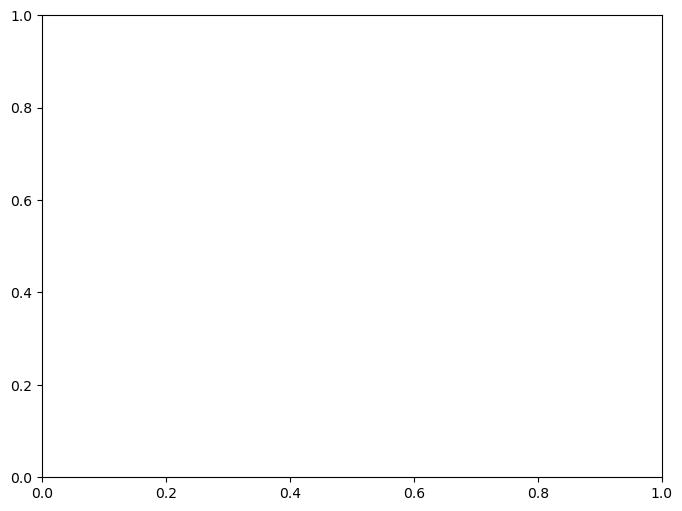

In [17]:
## Create a Figure with one axis and figsize (8,6)

fig, ax = plt.subplots(figsize=(8,6))

##  <span style="color:green"> >> Saving a Figure 


```python
plt.savefig(filename.ext,dpi,bbox_inches)
```
- **filename.ext**: The name and extension of the file (e.g., myplot.png, chart.pdf).
- **dpi**: Dots per inch, which controls the resolution of the saved image (default is usually 100).
- **bbox_inches**: Option to include padding around the plot. 'tight' removes unnecessary whitespace.
- **format**: Specifies the file format if not derived from the file extension (e.g., 'png', 'pdf', 'svg').


##  <span style="color:green"> >> Setting axis title, and x and y labels

```python
ax.set_title(title, fontsize=14)
```
- **title**: Title of the plot.Must be a string.
- **fontsize**: Font size of the title.

```python
ax.set_xlabel(xlabel, fontsize=12)
ax.set_ylabel(ylabel, fontsize=12)
```
- **xlabel**: Label for the x-axis. Must be a string.
- **ylabel**: Label for the y-axis. Must be a string.
- **fontsize**: Font size of the labels.


Text(0, 0.5, 'Frequency')

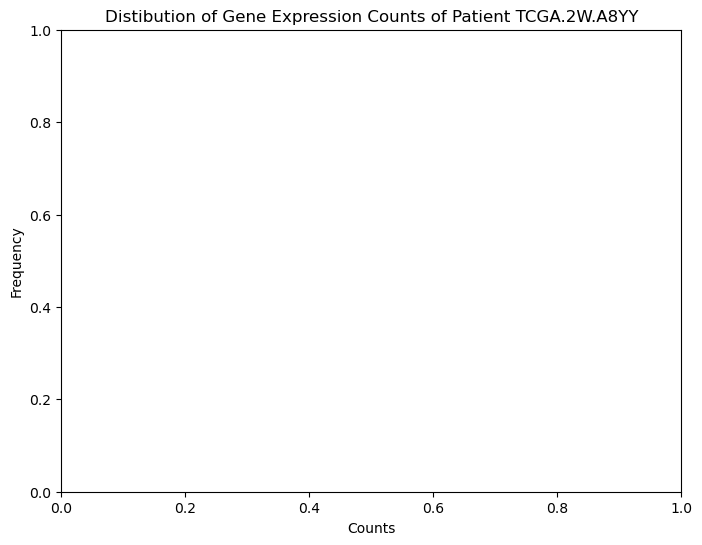

In [18]:
fig, ax = plt.subplots(figsize=(8,6))

## Set axis title as "Histogram"
ax.set_title("Distibution of Gene Expression Counts of Patient TCGA.2W.A8YY")

## Set x label as counts
ax.set_xlabel("Counts")
ax.set_ylabel("Frequency")





Text(0, 0.5, 'Frequency')

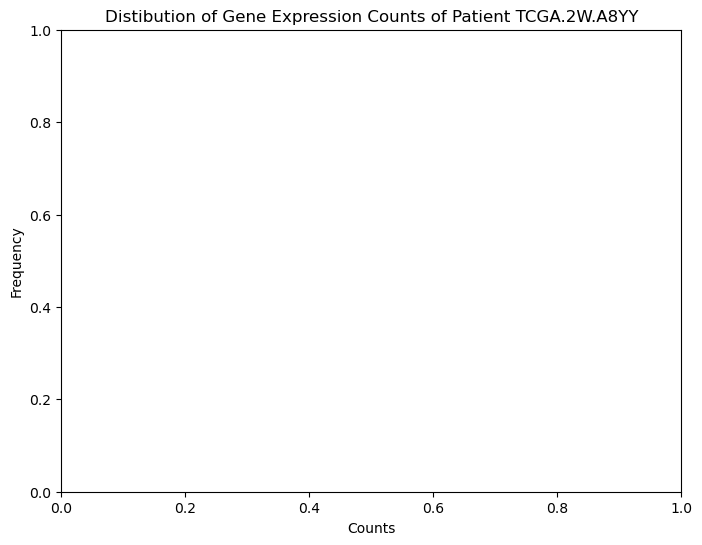

In [19]:
fig, ax = plt.subplots(figsize=(8,6))

## Set axis title as "Histogram"
ax.set_title("Distibution of Gene Expression Counts of Patient TCGA.2W.A8YY")

## Set x label as counts
ax.set_xlabel("Counts")
ax.set_ylabel("Frequency")


##  <span style="color:green"> >> Plotting a Histogram 


```python
ax.hist(x, bins=10,  orientation='vertical', cumulative=False)
```
- **x**: The data for the histogram.
- **bins**: The number of bins or a sequence of bin edges. Default is 10.
- **cumulative**: If True, a cumulative histogram is computed.

    

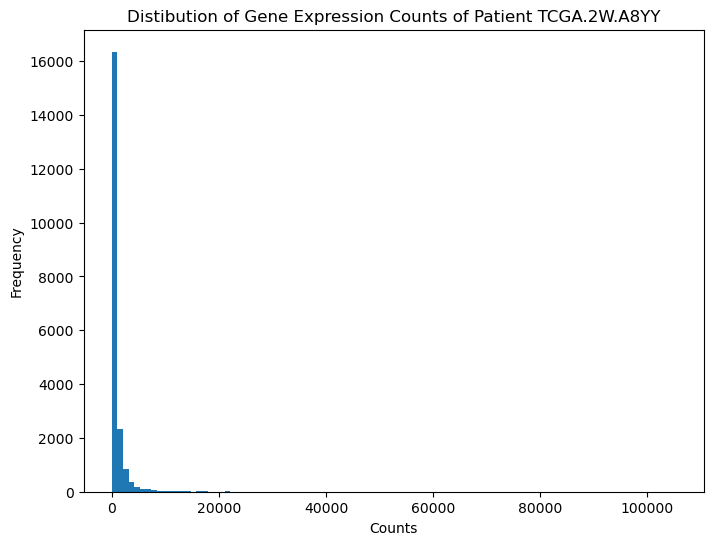

In [20]:
## Create figure and axis
fig, ax = plt.subplots(figsize=(8,6))

## Set axis title as "Histogram"
ax.set_title("Distibution of Gene Expression Counts of Patient TCGA.2W.A8YY")

## Set x label as counts
ax.set_xlabel("Counts")
ax.set_ylabel("Frequency")

## Select the row of patient TCGA.2W.A8YY from counts dataframe
data=counts.loc['TCGA.2W.A8YY', :]

## Plot a histogram of this data on the axis with 100 bins
ax.hist(data,bins=100)


## Save plot as png with high resolution and tight bounding box
plt.savefig('../results/patient_TCGA_2W_A8YY_histogram.png', dpi=300, bbox_inches='tight', format='png')

## Show plot
plt.show()


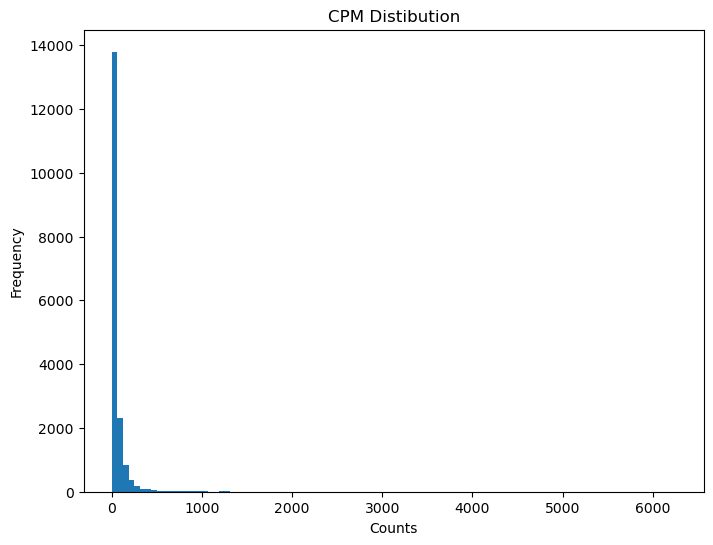

In [21]:
# Find the sum of all columns of the count data 
counts.sum(axis=0) 

# Check when is this sum >=294
counts.sum(axis=0) >= 294

# Select the data based on this condition of the columns 
filtered_counts = counts.loc[:, counts.sum(axis=0) >= 294]

# Multiply data by 10**6
filtered_counts.mul(10**6,axis=0)

# Find sum of each row 
filtered_counts.sum(axis=1)

# Divide data by sum of each row 
filtered_counts.div(filtered_counts.sum(axis=1),axis=0)

# Compute cpm
cpm=filtered_counts.mul(10**6).div(filtered_counts.sum(axis=1),axis=0)

# Plot Histogram of new CPM Distribution of  Gene Expression Counts of Patient TCGA.2W.A8YY"
fig, ax = plt.subplots(figsize=(8,6))

data=cpm.loc['TCGA.2W.A8YY', :]
ax.hist(data,bins=100)
ax.set_title("CPM Distibution")
ax.set_xlabel("Counts")
ax.set_ylabel("Frequency")

# Save plot as png to the results directory with high resolution and tight bounding box
plt.savefig('../results/cpm_histogram_TCGA_2W_A8YY.png', dpi=300, bbox_inches='tight', format='png')

plt.show()

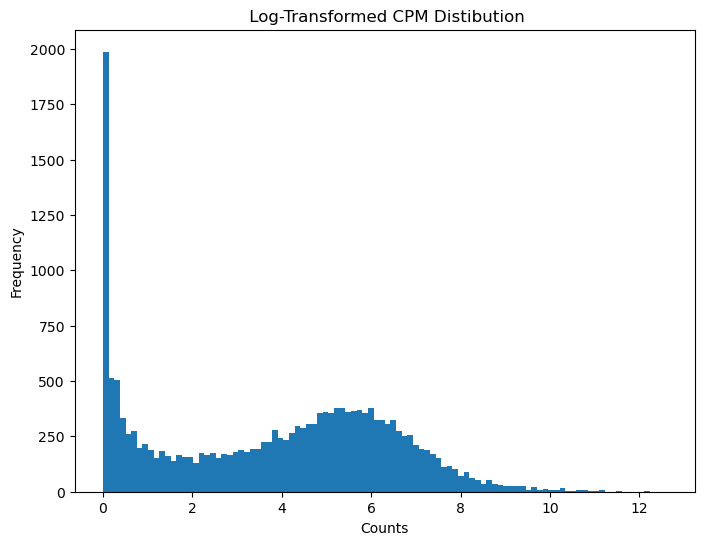

In [22]:
# Compute log-transformed CPM values (base 2), use log2 function from numpy 
log_cpm = np.log2(cpm + 1)

## Plot Histogram of Log-Transformed Distribution of  Gene Expression Counts of Patient TCGA.2W.A8YY"
fig, ax = plt.subplots(figsize=(8,6))

data=log_cpm.loc['TCGA.2W.A8YY', :]
ax.hist(data,bins=100)
ax.set_title(" Log-Transformed CPM Distibution")
ax.set_xlabel("Counts")
ax.set_ylabel("Frequency")

# Save plot as png to the results directory with high resolution and tight bounding box
plt.savefig('../results/log_cpm_histogram_TCGA_2W_A8YY.png', dpi=300, bbox_inches='tight', format='png')

plt.show()

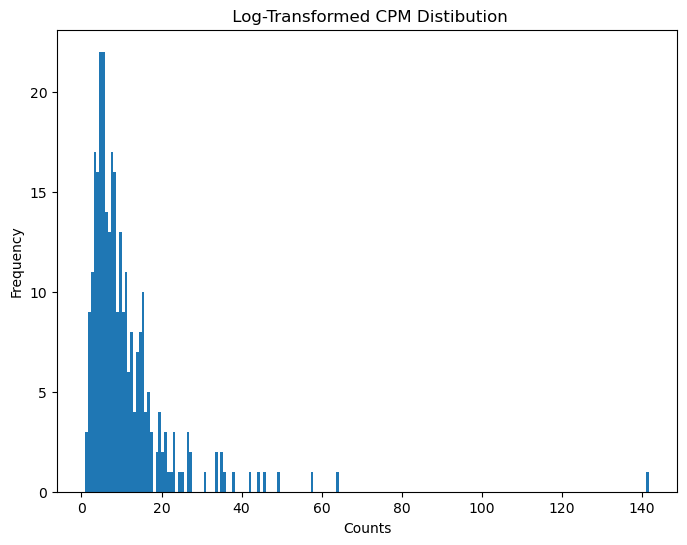

In [23]:

## Select the column of gene SOCS1 from cpm dataframe
cpm.loc[:, 'SOCS1']

# Plot Histogram of the Distribution of SOCS1 Expression
fig, ax = plt.subplots(figsize=(8,6))

data=cpm.loc[:, 'SOCS1']
ax.hist(data,bins=200)
ax.set_title(" Log-Transformed CPM Distibution")
ax.set_xlabel("Counts")
ax.set_ylabel("Frequency")

# Save plot as png to the results directory with high resolution and tight bounding box
plt.savefig('../results/socs1_cpm_histogram.png', dpi=300, bbox_inches='tight', format='png')

plt.show()

##  <span style="color:green"> >> Other plotting methods in matplotlib </span>

```python
ax.scatter(x, y, color='r', label='labelname', marker='o', s=60)
```
- **x, y**: Data points for the x and y axes.
- **color**: Color of the markers.
- **label**: Label for the scatter plot.
- **marker**: Marker style (e.g., 'o', '^', 's').
- **s**: Size of the markers.


```python
ax.plot(x, y, color='b', label='labelname', linestyle='-', linewidth=2, marker='o')
```
- **x, y**: Data points for the x and y axes.
- **color**: Color of the line.
- **label**: Label for the plot.
- **linestyle**: Style of the line (e.g., '-', '--', ':').
- **linewidth**: Width of the line.
- **marker**: Marker style for the points.


##  <span style="color:brown"> C. Data Analysis

##  <span style="color:brown">  Scikit-learn 
* Scikit-learn is a popular Python library used for machine learning and data mining. It provides simple and efficient tools for data analysis and modeling, making it a widely used resource in the machine learning community. Built on top of NumPy, SciPy, and matplotlib, it offers a comprehensive suite of algorithms for various machine learning tasks.

* Key Features: Classification, Regression, Clustering, Dimensionality Reduction, Model Selection,  Preprocessing, Pipeline

##  <span style="color:brown">  SciPy
* SciPy is an essential scientific computing library in Python, built on top of NumPy. It extends the functionality of NumPy by offering algorithms and mathematical functions for optimization, integration, interpolation, and statistics, among other tasks.

* While Scikit-learn focuses specifically on machine learning algorithms, such as classification, regression, clustering, and dimensionality reduction, it often relies on the mathematical functionalities provided by SciPy.
    


##  <span style="color:green "> >> Importing scikit-learn 
```python
%pip install scikit-learn
import sklearn
```    
    

In [24]:
#%pip install scikit-learn
import sklearn

    
##  <span style="color:green "> >> Importing scipy
```python
%pip install scipy
import scipy
``` 
    
    

In [25]:
#%pip install scipy
import scipy

##  <span style="color:green "> >> Importing PCA Functions from scikit-learn
```python
from sklearn.decomposition import PCA
```    

In [26]:
from sklearn.decomposition import PCA

In [27]:
# Select the standard deviation of each gene across all samples
gene_std = cpm.std(axis=0)

# Sort the standard deviations in descending order and select the top 100 most variable genes
gene_std_100 = gene_std.sort_values(ascending=False).head(100).index

# Select the top 100 most variable genes based on the standard deviation of their expression
variable_cpm = cpm[gene_std_100]

# Standardize (z-score) the data for the top 100 variable genes
# Subtract the mean of each gene and divide by the standard deviation
cpm_scaled = (variable_cpm - variable_cpm.mean()) / variable_cpm.std()


##  <span style="color:green "> >> Creating PCA object
```python
pca = PCA(n_components=<desired number of components>)
```    
- **n_components**: Specifies the number of principal components you want to keep. 


In [28]:
## Create a PCA object 
pca=PCA(n_components=2)

##  <span style="color:green "> >> Fitting the Data with PCA
```python
pca.fit_transform(data)
```    

In [29]:
## Fit the scaled data 
data=pca.fit_transform(cpm_scaled)
data.shape

(294, 2)

##  <span style="color:green "> >> Access the explained variance ratio for all components
```python
pca.explained_variance_ratio_
```
 

In [30]:
## Find explained variance ratio 
pxa_exp=pca.explained_variance_ratio_
pxa_exp

array([0.14251471, 0.07556676])

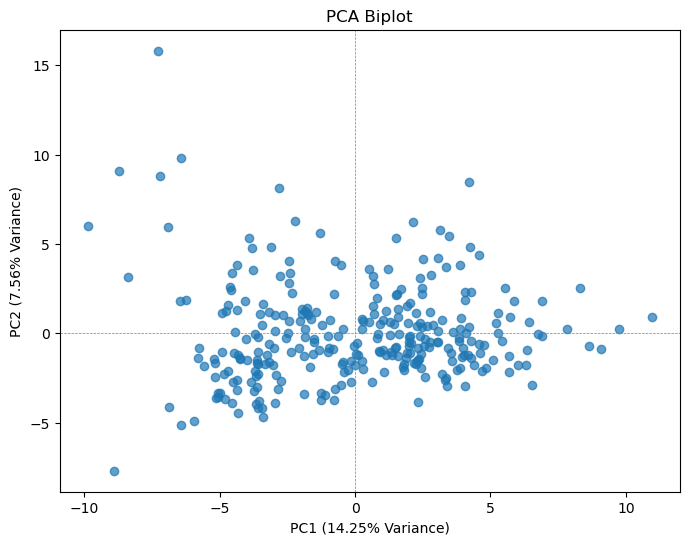

In [31]:
# Select the first column of the data by index 0 >> x-axis
data[:,0]

# Select the second column of the data by index 1 >> y-axis
data[:,1]

# Plot the data on a scatter plot and name it PCA Biplot
plt.figure(figsize=(8, 6))
plt.scatter(data[:,0],data[:,1], alpha=0.7)
plt.axhline(0, color='grey', linestyle='--', linewidth=0.5)
plt.axvline(0, color='grey', linestyle='--', linewidth=0.5)
plt.xlabel(f"PC1 ({pxa_exp[0] * 100:.2f}% Variance)")
plt.ylabel(f"PC2 ({pxa_exp[1] * 100:.2f}% Variance)")
plt.title("PCA Biplot")
plt.savefig('../results/pca_biplot.png', dpi=300, bbox_inches='tight', format='png')
plt.show()

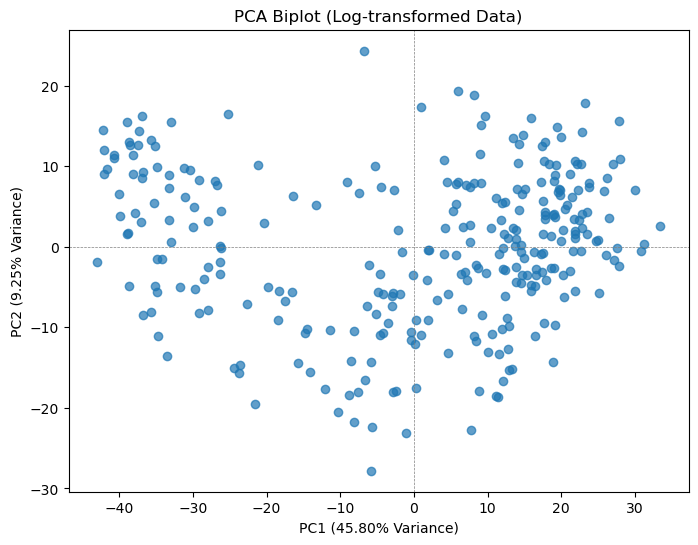

In [32]:
# Redo the PCA analysis and scatter plot for log_cpm data

# Select the top 100 most variable genes after log transformation
variable_log_cpm = log_cpm[log_cpm.std(axis=0).nlargest(100).index]

# Run PCA on the log-transformed data
pca = PCA()
log_pca_results = pca.fit_transform(variable_log_cpm)

# Display the explained variance ratios and cumulative variance
explained_variance = pca.explained_variance_ratio_

# Create the PCA biplot for the first two components
plt.figure(figsize=(8, 6))
plt.scatter(log_pca_results[:, 0], log_pca_results[:, 1], alpha=0.7)
plt.axhline(0, color='grey', linestyle='--', linewidth=0.5)
plt.axvline(0, color='grey', linestyle='--', linewidth=0.5)
plt.xlabel(f"PC1 ({explained_variance[0] * 100:.2f}% Variance)")
plt.ylabel(f"PC2 ({explained_variance[1] * 100:.2f}% Variance)")
plt.title("PCA Biplot (Log-transformed Data)")
plt.savefig('../results/pca_biplot_log_transformed.png', dpi=300, bbox_inches='tight', format='png')
plt.show()

##  <span style="color:green "> >> Importing K-Means clustering  Function from scikit-learn
    
```python
from sklearn.cluster import KMeans
```    

In [33]:
from sklearn.cluster import KMeans

##  <span style="color:green "> >> Creating KMeans object
```python
kmeans = KMeans(n_clusters,random_state)
```    
- **n_clusters**: Specifies the number of clusters the KMeans algorithm will form. You should define the number of clusters based on your analysis or prior knowledge of the data structure.

- **random_state**:  A seed for the random number generator to ensure reproducibility of results. Setting random_state is optional but helps if you need consistent results across different runs.

In [34]:
## Create KMeans Object with 3 clusters 
kmeans = KMeans(n_clusters=3)

##  <span style="color:green "> >> Fitting  Data with KMeans
```python
kmeans.fit_transform(data)
```    

In [35]:
## Fit the variable log cmp data 
kcluster=kmeans.fit_transform(variable_log_cpm)

##  <span style="color:green "> >> Accessing cluster_labels
```python
kmeans.cluster_labels_
```    

In [36]:
# Access the cluster centers
cluster_labels = kmeans.labels_

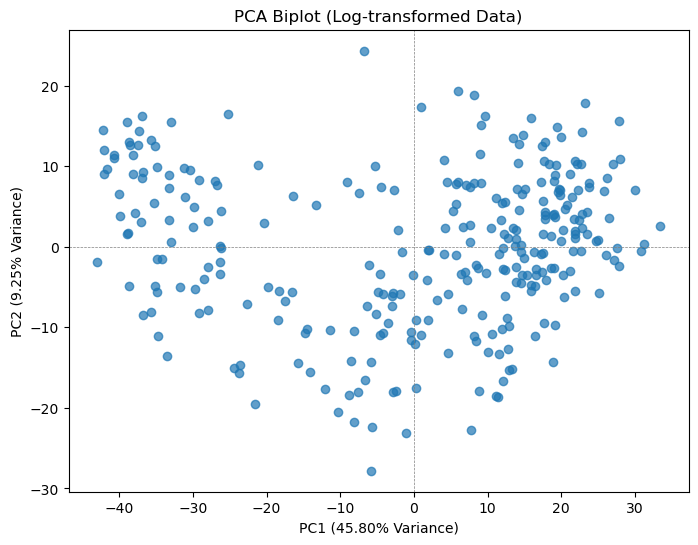

In [37]:
# Plot the log pca results from before 
plt.figure(figsize=(8, 6))
plt.scatter(log_pca_results[:, 0], log_pca_results[:, 1], alpha=0.7)
plt.axhline(0, color='grey', linestyle='--', linewidth=0.5)
plt.axvline(0, color='grey', linestyle='--', linewidth=0.5)
plt.xlabel(f"PC1 ({explained_variance[0] * 100:.2f}% Variance)")
plt.ylabel(f"PC2 ({explained_variance[1] * 100:.2f}% Variance)")
plt.title("PCA Biplot (Log-transformed Data)")
plt.show()

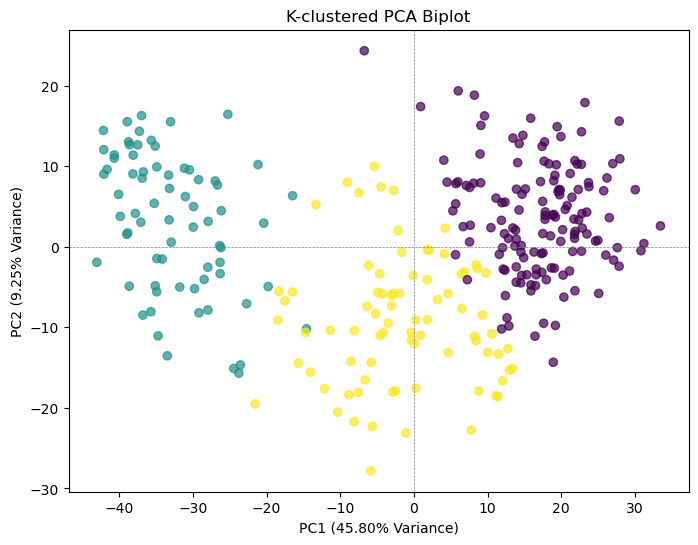

In [38]:
# Edit the scatter method by adding color mapping argument c=cluster_labels
plt.figure(figsize=(8, 6))
plt.scatter(log_pca_results[:, 0], log_pca_results[:, 1],c=cluster_labels, alpha=0.7)
plt.axhline(0, color='grey', linestyle='--', linewidth=0.5)
plt.axvline(0, color='grey', linestyle='--', linewidth=0.5)
plt.xlabel(f"PC1 ({explained_variance[0] * 100:.2f}% Variance)")
plt.ylabel(f"PC2 ({explained_variance[1] * 100:.2f}% Variance)")
plt.title("K-clustered PCA Biplot")
plt.savefig('../results/k_clustered_pca_biplot.png', dpi=300, bbox_inches='tight', format='png')
plt.show()

##  <span style="color:green "> >> Importing Hierarchical clustering Function from scikit-learn
    
```python
from sklearn.cluster import AgglomerativeClustering
```    
    

In [39]:
from sklearn.cluster import AgglomerativeClustering

##  <span style="color:green "> >> Creating cluster object
```python
hi_clusters= AgglomerativeClustering(n_clusters)
```
- **n_clusters**: Specifies the number of clusters the KMeans algorithm will form. You should define the number of clusters based on your analysis or prior knowledge of the data structure.


In [40]:
## Create hierarchical clustering object with 3 clusters 
hi_clusters= AgglomerativeClustering(n_clusters=3)

In [41]:
# Fit the variable_log_cpm data with hi_clusters
hi_clusters.fit(variable_log_cpm)

AgglomerativeClustering(n_clusters=3)

##  <span style="color:green "> >> Convert the clustering result into a linkage matrix (This is needed to plot the dendrogram)
```python
from scipy.cluster.hierarchy import linkage
Z = linkage(data,method)
```
    
- **data**: The input data that you want to cluster. This should be a 2D array or matrix where rows represent individual data points (samples), and columns represent features (variables).

- **method**: The linkage method used to compute the distance between clusters. The available options are:

* 'single': Nearest point linkage (minimum distance between points in different clusters).
* 'complete': Furthest point linkage (maximum distance between points in different clusters).
* 'average': Average of all pairwise distances between points in different clusters.
* 'ward': Minimizes the variance of the merged clusters. This is the default method and tends to create compact clusters.
* 'centroid': The distance between the centroids of the clusters.
* 'median': Similar to the centroid method but uses the median instead.

In [42]:
from scipy.cluster.hierarchy import linkage
Z = linkage(variable_log_cpm,method='ward')

##  <span style="color:green "> >> Plotting Dendogram Using Scipy
```python
from scipy.cluster.hierarchy import dendrogram
fig,ax=plt.subplots()
dendrogram(Z, no_labels=True)
```    
- **Z**: This is the linkage matrix that you computed using the linkage() function. It represents the hierarchical clustering of the data.

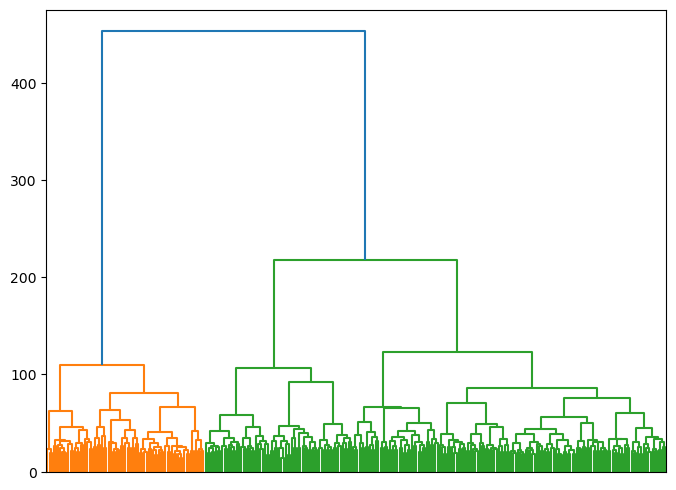

In [43]:
from scipy.cluster.hierarchy import dendrogram
fig,ax=plt.subplots(figsize=(8, 6))
dendrogram(Z, no_labels=True)
plt.savefig('../results/dendrogram_plot.png', dpi=300, bbox_inches='tight', format='png')
plt.show()

##  <span style="color:green "> >> Access Clustering labels Using Scipy
```python
from scipy.cluster.hierarchy import cut_tree
cut_tree(Z, n_clusters)
```
- **Z**: This is the linkage matrix that you computed using the linkage() function. It represents the hierarchical clustering of the data.

- **n_clusters**: The number of clusters you want to cut the hierarchical tree into. 

In [44]:
from scipy.cluster.hierarchy import cut_tree
hi_cut=cut_tree(Z, n_clusters=3).flatten()


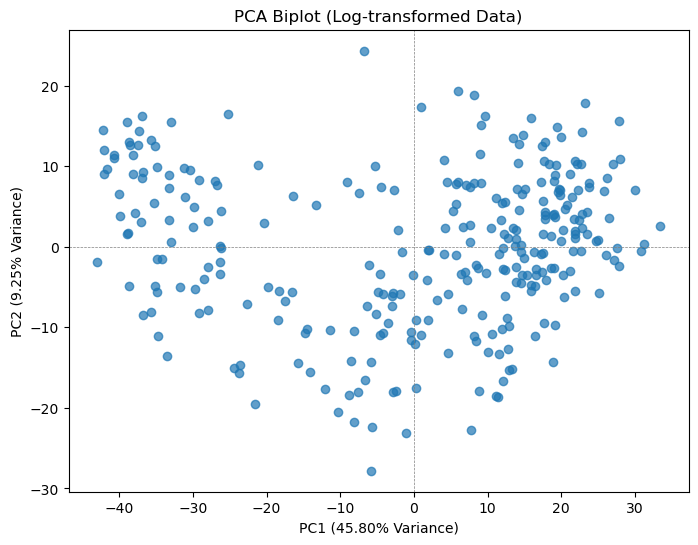

In [45]:
# Plot the log pca results from before 
plt.figure(figsize=(8, 6))
plt.scatter(log_pca_results[:, 0], log_pca_results[:, 1], alpha=0.7)
plt.axhline(0, color='grey', linestyle='--', linewidth=0.5)
plt.axvline(0, color='grey', linestyle='--', linewidth=0.5)
plt.xlabel(f"PC1 ({explained_variance[0] * 100:.2f}% Variance)")
plt.ylabel(f"PC2 ({explained_variance[1] * 100:.2f}% Variance)")
plt.title("PCA Biplot (Log-transformed Data)")
plt.show()

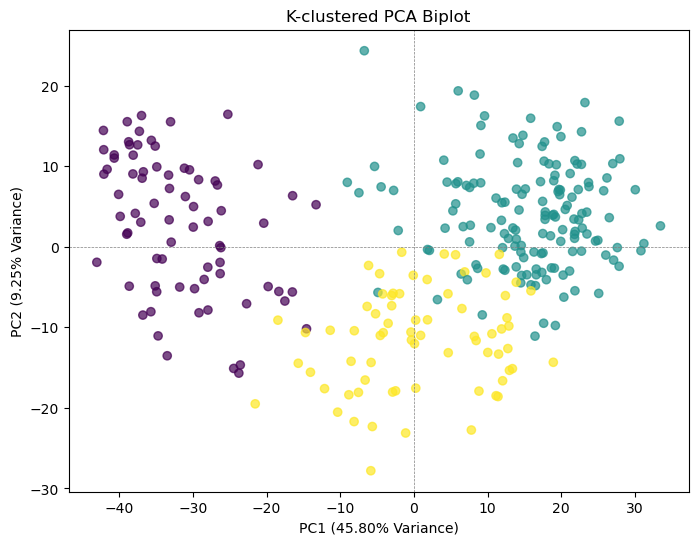

In [46]:
# Edit the scatter method by adding color mapping argument c=hi_cut
plt.figure(figsize=(8, 6))
plt.scatter(log_pca_results[:, 0], log_pca_results[:, 1],c=hi_cut, alpha=0.7)
plt.axhline(0, color='grey', linestyle='--', linewidth=0.5)
plt.axvline(0, color='grey', linestyle='--', linewidth=0.5)
plt.xlabel(f"PC1 ({explained_variance[0] * 100:.2f}% Variance)")
plt.ylabel(f"PC2 ({explained_variance[1] * 100:.2f}% Variance)")
plt.title("K-clustered PCA Biplot")
plt.savefig('../results/k_clustered_pca_biplot.png', dpi=300, bbox_inches='tight', format='png')
plt.show()